# Time Series Forecasting with Python (ARIMA, LSTM, Prophet)

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 28.2MB/s 
     |████████████████████████████████| 9.5MB 30.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In this article we will try to forecast a time series data basically. We'll build three different model with Python and inspect their results. Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) and Facebook Prophet. Let's jump in and start with ARIMA.

## ARIMA (Autoregressive Integrated Moving Average)


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/arima.png" width="1200">

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis. 
* **AR (Autoregression) :** Model that shows a changing variable that regresses on its own lagged/prior values.
* **I (Integrated) :**  Differencing of raw observations to allow for the time series to become stationary
* **MA (Moving average) :** Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* **p:** the number of lag observations in the model; also known as the lag order.
* **d:** the number of times that the raw observations are differenced; also known as the degree of differencing.
* **q:** the size of the moving average window; also known as the order of the moving average.

For more information about ARIMA you can check:
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

For more detail:
<br>
[What is LSTM?](https://hub.packtpub.com/what-is-lstm/)
<br>
[What is LSTM? - Quora](https://www.quora.com/What-is-LSTM)
<br>
[Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

## Prophet

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/prophet.png" width="1200">

> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

[Facebook's Prophet Web Page](https://facebook.github.io/prophet/)<br>
[Forecasting at Scale](https://peerj.com/preprints/3190.pdf)


# FORECAST BEER PRODUCTION


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/beer.jpg" width="1200">

## Read Dataset

In [3]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/monthly-beer-production-in-austr.csv
df = pd.read_csv('monthly-beer-production-in-austr.csv')

--2021-05-18 18:26:12--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/monthly-beer-production-in-austr.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.86
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6426 (6.3K) [application/vnd.ms-excel]
Saving to: ‘monthly-beer-production-in-austr.csv’

monthly-beer-produc 100%[===================>]   6.28K  --.-KB/s    in 0s      

2021-05-18 18:26:13 (205 MB/s) - ‘monthly-beer-production-in-austr.csv’ saved [6426/6426]



In [4]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [6]:
df.Month = pd.to_datetime(df.Month)

In [7]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [8]:
df.index.freq = 'MS'

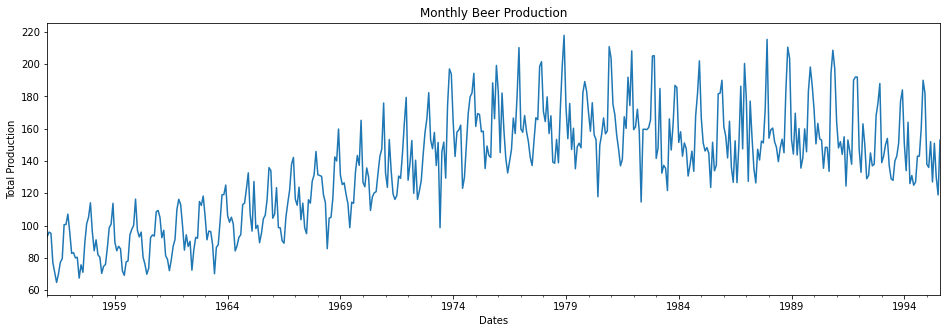

In [9]:
ax = df['Monthly beer production'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

> Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
> It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

> There are four seasonal elements that are not part of ARIMA that must be configured; they are:<br>
**P:** Seasonal autoregressive order.<br>
**D:** Seasonal difference order.<br>
**Q:** Seasonal moving average order.<br>
**m:** The number of time steps for a single seasonal period.<br>

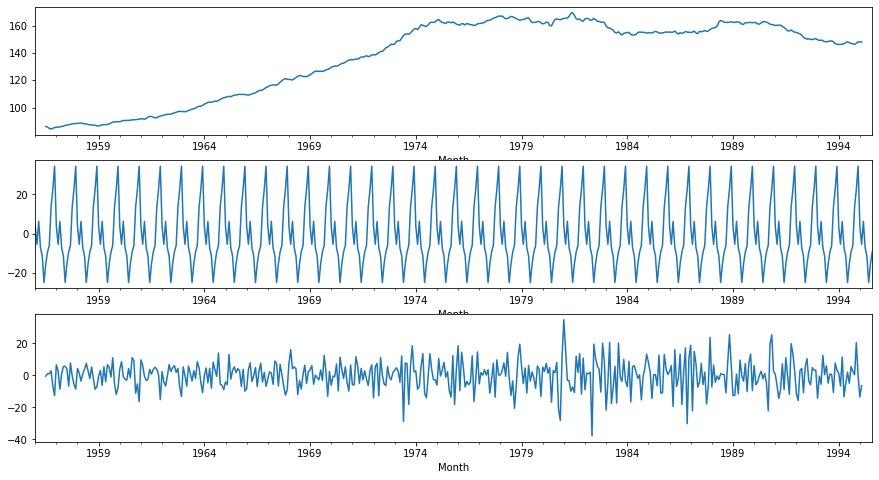

In [10]:
import matplotlib.pyplot as plt

a = seasonal_decompose(df["Monthly beer production"], model = "add")

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
a.trend.plot(ax=ax1)
a.seasonal.plot(ax=ax2)
a.resid.plot(ax=ax3)

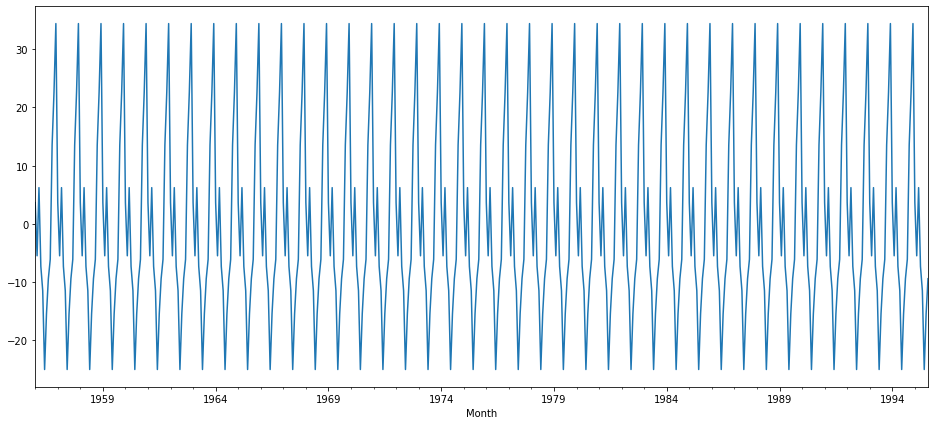

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [ ]:
auto_arima(df['Monthly beer production'],
           seasonal=True, 
           m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 1)x(4, 0, 3, 12)

Let's split the data into train and test set

In [13]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [14]:
arima_model = SARIMAX(train_data['Monthly beer production'],
                      order = (2,1,1), 
                      seasonal_order = (4,0,3,12))

arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.969
Date:                                    Tue, 18 May 2021   AIC                           3437.938
Time:                                            18:27:47   BIC                           3483.453
Sample:                                        01-01-1956   HQIC                          3455.856
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1172      0.035     -3.345      0.001      -0.186      -0.049
ar.L2         -0.1673      0.047     -3.576      0.000      -0.259      -0.076
ma.L1         -0.8457      0.027    -30.847      0.000      -0.899      -0.792
ar.S.L12       1.7576      0.121     14.544      0.000       1.521       1.995
ar.S.L24      -1.6137      0.233     -6.931      0.000      -2.070      -1.157
ar.S.L36       0.7935      0.184      4.306      0.000       0.432       1.155
ar.S.L48       0.0612      0.067      0.909      0.364      -0.071       0.193
ma.S.L12      -1.5565      0.130    -11.973      0.000      -1.811      -1.302
ma.S.L24       1.3902      0.216      6.437      0.000       0.967       1.814
ma.S.L36      -0.6637      0.125     -5.306      0.000      -0.909      -0.419
sigma2        85.1704      4.979     17.106      0.000      75.412      94.929
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                40.57
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.241516
1994-10-01    157.620190
1994-11-01    181.593237
1994-12-01    183.646905
1995-01-01    145.052873
1995-02-01    137.066758
1995-03-01    151.360742
1995-04-01    133.289272
1995-05-01    137.980286
1995-06-01    120.671092
1995-07-01    128.454060
1995-08-01    138.979393
Freq: MS, Name: ARIMA Predictions, dtype: float64

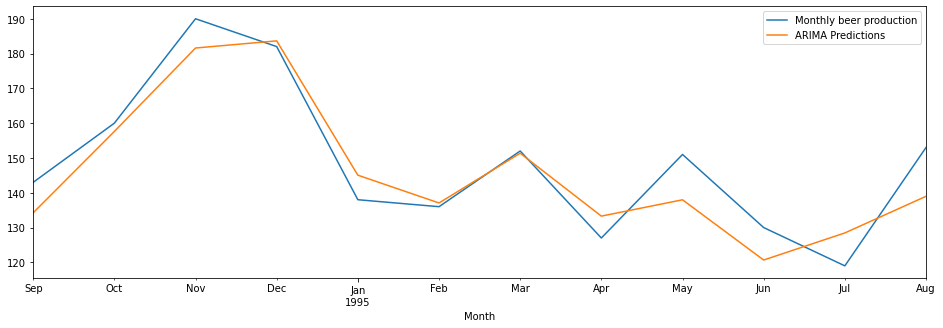

In [16]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [17]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 65.75860371663133
RMSE Error: 8.109167880654052
Mean: 136.39537815126045


In [18]:
test_data['ARIMA_Predictions'] = arima_pred

## LSTM Forecast

First we'll scale our train and test data with MinMaxScaler

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

Before creating LSTM model we should create a Time Series Generator object.

In [21]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, 
                                scaled_train_data, 
                                length=n_input, 
                                batch_size=1)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [23]:
lstm_model.fit_generator(generator,
                         epochs=20)

Epoch 1/20
452/452 [==============================] - 6s 11ms/step - loss: 0.0424
Epoch 2/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0127
Epoch 3/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0110
Epoch 4/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0090
Epoch 5/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0087
Epoch 6/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0074
Epoch 7/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0074
Epoch 8/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0069
Epoch 9/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0067
Epoch 10/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0078
Epoch 11/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0076
Epoch 12/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0073
Epoch 13/20
4

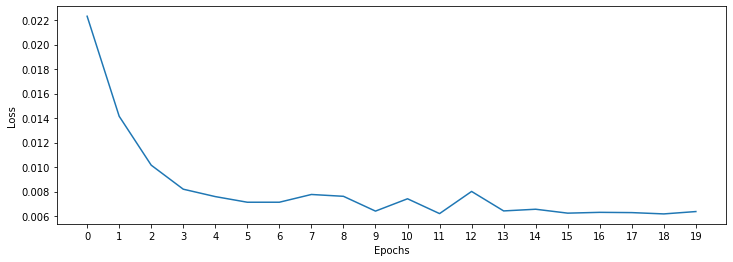

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

As you know we scaled our data that's why we have to inverse it to see true predictions.

In [ ]:
lstm_predictions_scaled

[array([0.5249966], dtype=float32),
 array([0.5966518], dtype=float32),
 array([0.70787567], dtype=float32),
 array([0.70926464], dtype=float32),
 array([0.56044257], dtype=float32),
 array([0.52564156], dtype=float32),
 array([0.5827136], dtype=float32),
 array([0.44483128], dtype=float32),
 array([0.44439375], dtype=float32),
 array([0.42076108], dtype=float32),
 array([0.44468975], dtype=float32),
 array([0.50739825], dtype=float32)]

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [ ]:
lstm_predictions

array([[145.12447654],
       [156.08772426],
       [173.10497736],
       [173.31748931],
       [150.54771273],
       [145.22315876],
       [153.95518141],
       [132.85918613],
       [132.79224436],
       [129.17644503],
       [132.83753185],
       [142.4319319 ]])

In [ ]:
test_data['LSTM_Predictions'] = lstm_predictions

In [ ]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions
Month,,,
1994-09-01,143.0,134.241516,145.124477
1994-10-01,160.0,157.620190,156.087724
1994-11-01,190.0,181.593237,173.104977
1994-12-01,182.0,183.646905,173.317489
1995-01-01,138.0,145.052873,150.547713
1995-02-01,136.0,137.066758,145.223159
1995-03-01,152.0,151.360742,153.955181
1995-04-01,127.0,133.289272,132.859186
1995-05-01,151.0,137.980286,132.792244


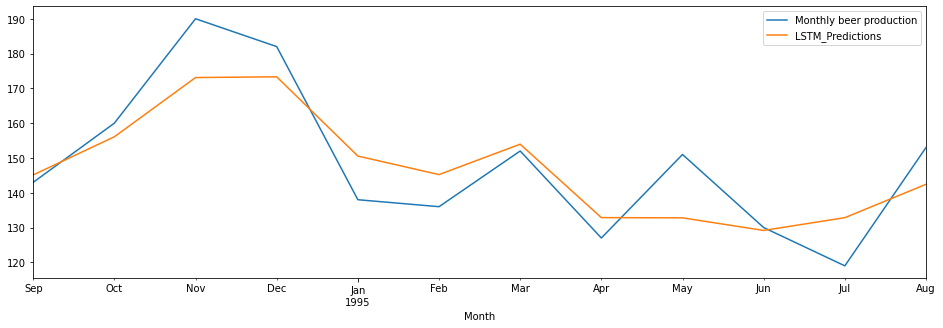

In [ ]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [ ]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 108.05613267258421
RMSE Error: 10.39500517905519
Mean: 136.39537815126045


## Prophet Forecast

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [ ]:
df_pr = df.copy()
df_pr = df.reset_index()

In [ ]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [ ]:
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.043859,130.827059,155.047290,150.976415,151.092437,-7.957704,-7.957704,-7.957704,-7.957704,-7.957704,-7.957704,0.0,0.0,0.0,143.086155
472,1995-05-01,150.979616,126.513529,152.104086,150.887231,151.052250,-11.394498,-11.394498,-11.394498,-11.394498,-11.394498,-11.394498,0.0,0.0,0.0,139.585118
473,1995-06-01,150.913231,114.931577,139.172869,150.797196,151.015402,-23.904571,-23.904571,-23.904571,-23.904571,-23.904571,-23.904571,0.0,0.0,0.0,127.008661
474,1995-07-01,150.848988,122.637042,147.891388,150.718619,150.985827,-15.751614,-15.751614,-15.751614,-15.751614,-15.751614,-15.751614,0.0,0.0,0.0,135.097374
475,1995-08-01,150.782603,129.607086,154.137121,150.628245,150.954966,-9.209502,-9.209502,-9.209502,-9.209502,-9.209502,-9.209502,0.0,0.0,0.0,141.573101


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [ ]:
prophet_pred = prophet_pred.set_index("Date")

In [ ]:
prophet_pred.index.freq = "MS"

In [ ]:
prophet_pred

,Pred
Date,
1994-09-01,144.980217
1994-10-01,166.012222
1994-11-01,173.629620
1994-12-01,185.881744
1995-01-01,155.163406
1995-02-01,146.732442
1995-03-01,158.844417
1995-04-01,143.086155
1995-05-01,139.585118


In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
import seaborn as sns

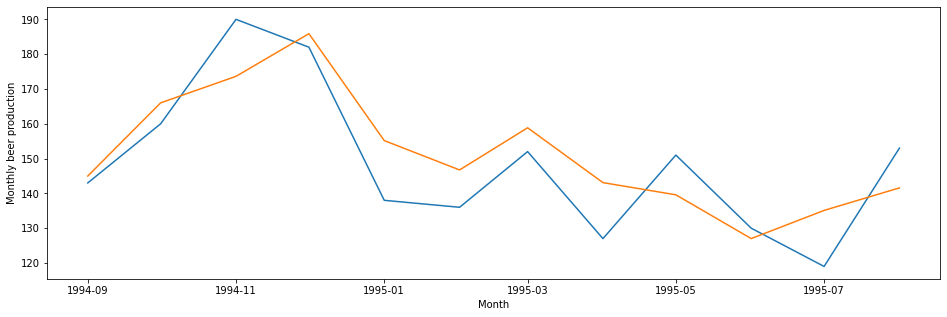

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 130.62088996007174
RMSE Error: 11.428949643780557
Mean: 136.39537815126045


In [ ]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],
                       "RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

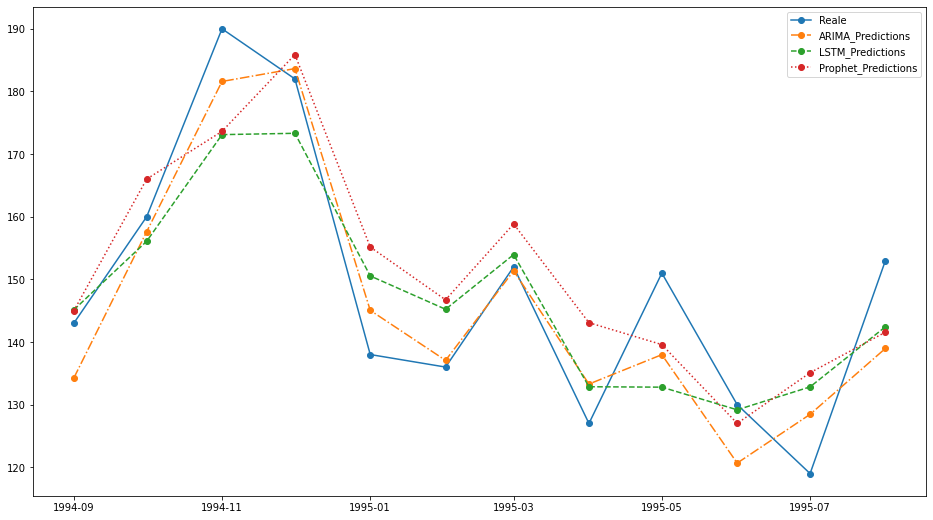

In [ ]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-",label='Reale')
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.",label='ARIMA_Predictions')
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--",label='LSTM_Predictions')
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":",label='Prophet_Predictions')
plt.legend()
plt.show()

In [ ]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.109168,65.758604
1,LSTM,10.395005,108.056133
2,Prophet,11.428950,130.620890


In [ ]:
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
Month,,,,
1994-09-01,143.0,134.241516,145.124477,144.980217
1994-10-01,160.0,157.620190,156.087724,166.012222
1994-11-01,190.0,181.593237,173.104977,173.629620
1994-12-01,182.0,183.646905,173.317489,185.881744
1995-01-01,138.0,145.052873,150.547713,155.163406
1995-02-01,136.0,137.066758,145.223159,146.732442
1995-03-01,152.0,151.360742,153.955181,158.844417
1995-04-01,127.0,133.289272,132.859186,143.086155
1995-05-01,151.0,137.980286,132.792244,139.585118


In [ ]:
test_data.to_excel('export.xlsx')